In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


**********Welcome To The Expense Manager**********

Your Expenses:
  Transaction_ID       Date  Amount Category Description
              1 01/02/3003   65000     RENT      GHAGGS
              2 01/01/2002    9855   MOBILE      HSHSHS
              3 01/09/6006   54000  SERVICE     SHAHAHA
Expense deleted successfully!

Your Expense Report:
  Transaction_ID       Date  Amount Category Description
              2 01/01/2002    9855   MOBILE      HSHSHS
              3 01/09/6006   54000  SERVICE     SHAHAHA


C:\Users\HASNAIN\AppData\Local\Temp\ipykernel_26652\3559672976.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Category"], y=df["Amount"], palette="viridis")


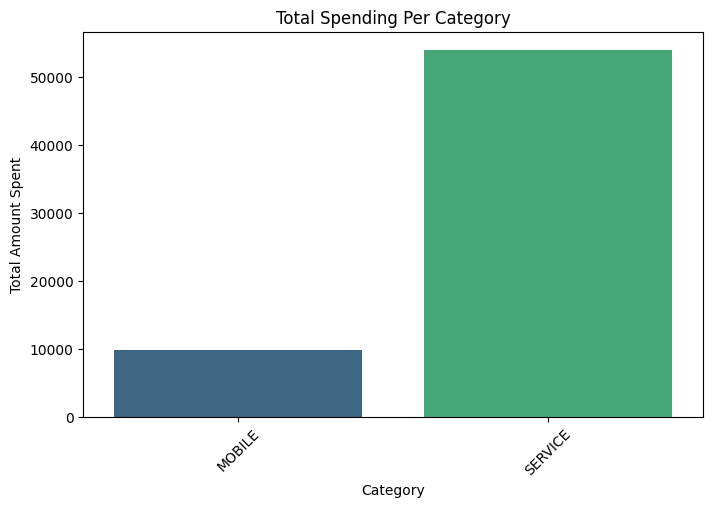

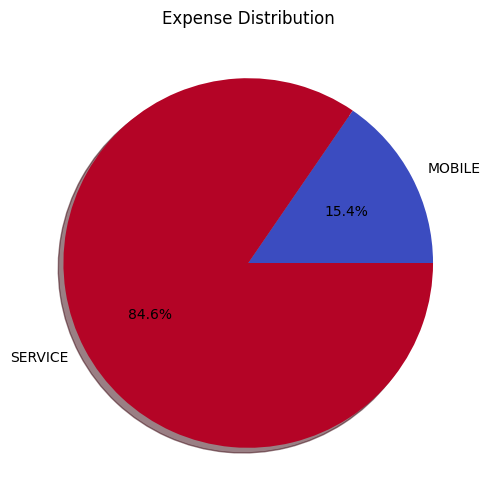

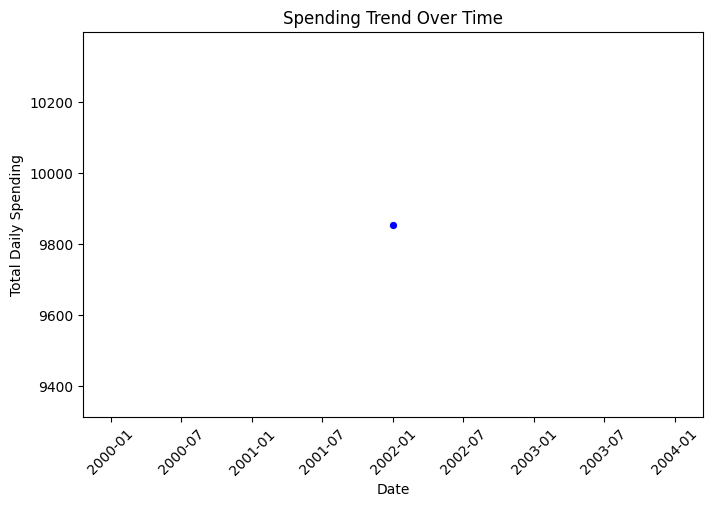

Exiting Expense Manager. Goodbye!


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Title Display
title = "Welcome To The Expense Manager"
print(title.center(50, '*'))

main_file = "DATASET.csv"

# Ensure the dataset file exists
if not pd.io.common.file_exists(main_file):
    pd.DataFrame(columns=["Transaction_ID", "Date", "Amount", "Category", "Description"]).to_csv(main_file, index=False)

class ExpenseTracker:
    def __init__(self):
        self.transaction_id = self.get_next_transaction_id()

    def get_next_transaction_id(self):
        try:
            df = pd.read_csv(main_file)
            if df.empty:
                return 1
            return df["Transaction_ID"].max() + 1
        except Exception:
            return 1

    def add_expense(self):
        date = input("Enter date (dd/mm/yyyy): ")
        amount = input("Enter amount: ")
        category = input("Enter category: ")
        description = input("Enter description (20 words only): ")
        
        new_expense = pd.DataFrame([[self.transaction_id, date, amount, category, description]],
                                   columns=["Transaction_ID", "Date", "Amount", "Category", "Description"])
        new_expense.to_csv(main_file, mode='a', header=False, index=False)
        print(f"Expense added successfully with Transaction ID {self.transaction_id}!")
        self.transaction_id += 1
    
    def show_report(self):
        try:
            df = pd.read_csv(main_file)
            if df.empty:
                print("No records found!")
                return

            df["Amount"] = pd.to_numeric(df["Amount"], errors="coerce")
            df.dropna(inplace=True)

            print("\nYour Expense Report:\n", df.to_string(index=False))

            # Visualization: Total Spending per Category
            plt.figure(figsize=(8, 5))
            sns.barplot(x=df["Category"], y=df["Amount"], palette="viridis")
            plt.xlabel("Category")
            plt.ylabel("Total Amount Spent")
            plt.title("Total Spending Per Category")
            plt.xticks(rotation=45)
            plt.show()

            # Pie Chart of Spending
            plt.figure(figsize=(6, 6))
            df.groupby("Category")["Amount"].sum().plot(kind="pie", autopct="%1.1f%%", cmap="coolwarm", shadow=True)
            plt.title("Expense Distribution")
            plt.ylabel("")
            plt.show()

            # Spending Over Time
            df["Date"] = pd.to_datetime(df["Date"], dayfirst=True, errors="coerce")
            df.dropna(subset=["Date"], inplace=True)
            daily_expense = df.groupby("Date")["Amount"].sum()

            plt.figure(figsize=(8, 5))
            sns.lineplot(x=daily_expense.index, y=daily_expense.values, marker="o", color="blue")
            plt.xlabel("Date")
            plt.ylabel("Total Daily Spending")
            plt.title("Spending Trend Over Time")
            plt.xticks(rotation=45)
            plt.show()
        except Exception as e:
            print(f"Error: {e}")

    def delete_entry(self):
        try:
            df = pd.read_csv(main_file)
            if df.empty:
                print("No records found!")
                return
            
            print("\nYour Expenses:\n", df.to_string(index=False))
            trans_id = int(input("Enter the Transaction ID of the entry to delete: "))

            if trans_id not in df["Transaction_ID"].values:
                print("Invalid Transaction ID!")
                return

            df = df[df["Transaction_ID"] != trans_id]
            df.to_csv(main_file, index=False)
            print("Expense deleted successfully!")

        except Exception as e:
            print(f"Error: {e}")

    def filter_expenses(self):
        try:
            df = pd.read_csv(main_file)
            if df.empty:
                print("No records found!")
                return

            filter_choice = input("Filter by (1) Date or (2) Category? ")
            if filter_choice == "1":
                date = input("Enter date (dd/mm/yyyy): ")
                result = df[df["Date"] == date]
            elif filter_choice == "2":
                category = input("Enter category: ")
                result = df[df["Category"] == category]
            else:
                print("Invalid choice!")
                return

            if result.empty:
                print("No records found for the given filter!")
            else:
                print("\nFiltered Expenses:\n", result.to_string(index=False))

        except Exception as e:
            print(f"Error: {e}")

tracker = ExpenseTracker()

# Main Menu
while True:
    main_menu = input('''\n1. Add new expense 
2. Delete entry
3. Show report 
4. Filter expenses
5. Exit
Enter your choice: ''')

    if main_menu == "1":
        tracker.add_expense()
    elif main_menu == "2":
        tracker.delete_entry()
    elif main_menu == "3":
        tracker.show_report()
    elif main_menu == "4":
        tracker.filter_expenses()
    elif main_menu == "5":
        print("Exiting Expense Manager. Goodbye!")
        break
    else:
        print("Invalid choice! Please enter a valid option.")